In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform,randint
from datetime import datetime
import re

In [3]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, make_scorer
from scipy.stats import ks_2samp
from Fonctions import fit_and_print
from imblearn.over_sampling import SMOTE

In [4]:
df_feat = pd.read_excel("/Users/user/Documents/Projet_Covid/Data/df_cleared.xlsx")
df_feat.head()

,Unnamed: 0,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,1,126e9dd13932f68,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1
1,8,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0
2,15,6c9d3323975b082,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1
3,18,d3ea751f3db9de9,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1
4,22,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0


In [5]:
df_feat = df_feat.iloc[: , 1:]

In [6]:
df_feat

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,126e9dd13932f68,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1
1,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0
2,6c9d3323975b082,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1
3,d3ea751f3db9de9,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1
4,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,c5b44ff9c7782fd,19,0,0,0,0,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,0.892207,-0.474754,1.066653,0.347948,0
598,88cce1444e16f9c,19,0,0,0,0,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-0.540532,-1.976971,1.670707,0.967144,0
599,2733fac0d3f7138,15,0,0,0,0,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,-0.709090,0.005955,0.909074,-1.155812,0
600,acd761fe16b5d0f,17,0,0,0,0,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,-0.582671,1.408024,1.381812,-0.448160,0


In [7]:
df_feat.shape

(602, 18)

In [8]:
features = [c for c in df_feat.columns if c not in ['Patient ID', 'SARS-Cov-2 exam result',
                                                   'Patient addmited to regular ward (1=yes, 0=no)',
                                                   'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                   'Patient addmited to intensive care unit (1=yes, 0=no)']]


# Metrics Selection

It's a binary classification, so we're going to focus on 2 metrics: accuracy, to ensure the precision of the classification, and recall, to focus on the model's ability to identify true positives among the model's positive elements. We'll work by prioritizing a compromise between accuracy and recall as a desirable performance.


# Models

## Random Forest

In [9]:
X = df_feat[features]
y = df_feat['SARS-Cov-2 exam result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Split between test and train!")

#Apply RF
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)  
fit_and_print(rf,X_train,X_test,y_train,y_test)

Split between test and train!
Confusion Matrix: 
 [[101   3]
 [ 11   6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       104
           1       0.67      0.35      0.46        17

    accuracy                           0.88       121
   macro avg       0.78      0.66      0.70       121
weighted avg       0.87      0.88      0.87       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.35294117647058826
AUC:  0.6620475113122172
KS:  0.3240950226244344


We observe a precision of 89%, which is quite good, but the recall score is 23.5%, which is relatively low, since it indicates, along with the f1-score, whether there is a high proportion of false positives or false negatives. As the precision is satisfactory, we'll try to improve the recall score using a randomsearch and then a gridsearch on the hyper-parameters.
Another important point is that the test set is quite small, which raises questions about the generalization of the model.

In [10]:
max_feat = ['sqrt', 'log2'] + list(range(1, 31))
random_grid = {'n_estimators': [10, 50, 100, 200, 500],
            'max_features': max_feat,
            'max_depth': [2, 8, 16, 32, 64, 128],
            'min_samples_split': [2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}

scoring = { 'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score) }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 200, 
                               cv = 5, 
                               scoring = scoring, 
                               refit="recall",
                               verbose=0, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
fit_and_print(rf_random,X_train,X_test,y_train,y_test)
print(rf_random.best_params_)
print("Best recall score: ", rf_random.cv_results_['mean_test_recall'][rf_random.best_index_])
print("Best accuracy score: ", rf_random.cv_results_['mean_test_accuracy'][rf_random.best_index_])

Confusion Matrix: 
 [[99  5]
 [11  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       104
           1       0.55      0.35      0.43        17

    accuracy                           0.87       121
   macro avg       0.72      0.65      0.68       121
weighted avg       0.85      0.87      0.86       121

Accuracy Score:  0.8677685950413223
Recall Score: 0.35294117647058826
AUC:  0.6524321266968326
KS:  0.3048642533936652
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 16, 'max_depth': 128}
Best recall score:  0.4406593406593407
Best accuracy score:  0.89196735395189


We improve the recall and accuracy, from the test I did it seems like max_features parameter have a huge impact on recall maybe we can explore more values on this side. Now let's have a look at how gridsearch works it out

In [11]:
gridsearch_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 8, 16, 32, 64, 128],
    'min_samples_split': [2, 4, 8, 16, 24],
    'min_samples_leaf': [1, 2, 5, 10, 15, 30],
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(
 estimator=rf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring=scoring,
 refit='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(rf_grid,X_train,X_test,y_train,y_test)
print(rf_grid.best_params_)
print("Best recall score: ", rf_grid.cv_results_['mean_test_recall'][rf_grid.best_index_])
print("Best accuracy score: ", rf_grid.cv_results_['mean_test_accuracy'][rf_grid.best_index_])

Confusion Matrix: 
 [[102   2]
 [ 12   5]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       104
           1       0.71      0.29      0.42        17

    accuracy                           0.88       121
   macro avg       0.80      0.64      0.68       121
weighted avg       0.87      0.88      0.86       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.29411764705882354
AUC:  0.6374434389140271
KS:  0.2748868778280543
{'max_depth': 64, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}
Best recall score:  0.4384615384615385
Best accuracy score:  0.8940077319587629


Randomsearch is less efficient than grid search, recall is improved, but the improvement is less. Note that it is possible to further improve hyperparameter search by using the hyperopt library (TPE,...).

To rebalance the data and obtain better results, we'll use SMOTE :

SMOTE, an acronym for Synthetic Minority Oversampling Technique, is a method for oversampling minority observations. To avoid simply cloning minority individuals, SMOTE is based on a simple principle: generate new minority individuals that resemble the others, without being strictly identical. The result is a more homogeneous population of minority individuals.

A Machine Learning model is then trained on these transformed data, to which false synthetic individuals have been added.


## SMOTE

In [12]:
smt = SMOTE(k_neighbors=5, random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

np.bincount(y_train)

array([415, 415])

New random forest training

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)  
fit_and_print(rf,X_train,X_test,y_train,y_test)

Confusion Matrix: 
 [[99  5]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       104
           1       0.69      0.65      0.67        17

    accuracy                           0.91       121
   macro avg       0.82      0.80      0.81       121
weighted avg       0.91      0.91      0.91       121

Accuracy Score:  0.9090909090909091
Recall Score: 0.6470588235294118
AUC:  0.7994909502262443
KS:  0.5989819004524887


The recall is improved let's test with gridsearch and randomsearch from now on.

In [42]:
max_feat = ['sqrt', 'log2'] + list(range(1, 31))
random_grid = {'n_estimators': [10, 50, 100, 200, 250, 500],
            'max_features': max_feat,
            'max_depth': [2, 8, 16, 24, 32, 64],
            'min_samples_split': [2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,20]}

scoring = { 'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score) }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 200, 
                               cv = 5, 
                               scoring = scoring, 
                               refit="recall",
                               verbose=0, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
fit_and_print(rf_random,X_train,X_test,y_train,y_test)
print(rf_random.best_params_)
print("Best recall score: ", rf_random.cv_results_['mean_test_recall'][rf_random.best_index_])
print("Best accuracy score: ", rf_random.cv_results_['mean_test_accuracy'][rf_random.best_index_])

Confusion Matrix: 
 [[94 10]
 [ 4 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       104
           1       0.57      0.76      0.65        17

    accuracy                           0.88       121
   macro avg       0.76      0.83      0.79       121
weighted avg       0.90      0.88      0.89       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.7647058823529411
AUC:  0.8342760180995474
KS:  0.668552036199095
{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 26, 'max_depth': 8}
Best recall score:  0.96144578313253
Best accuracy score:  0.9421686746987952


We improve a lot the recall, we also notice that the best values of recall and accuracy reach by the model are way higher than before

In [27]:
gridsearch_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 8, 16, 32, 64, 128],
    'min_samples_split': [2, 4, 8, 16, 24],
    'min_samples_leaf': [1, 2, 5, 10, 15, 30],
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(
 estimator=rf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring=scoring,
 refit='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(rf_grid,X_train,X_test,y_train,y_test)
print(rf_grid.best_params_)
print("Best recall score: ", rf_grid.cv_results_['mean_test_recall'][rf_grid.best_index_])
print("Best accuracy score: ", rf_grid.cv_results_['mean_test_accuracy'][rf_grid.best_index_])

Confusion Matrix: 
 [[98  6]
 [ 5 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       104
           1       0.67      0.71      0.69        17

    accuracy                           0.91       121
   macro avg       0.81      0.82      0.82       121
weighted avg       0.91      0.91      0.91       121

Accuracy Score:  0.9090909090909091
Recall Score: 0.7058823529411765
AUC:  0.8240950226244345
KS:  0.6481900452488688
{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best recall score:  0.9710843373493976
Best accuracy score:  0.9530120481927711


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


We obtain 76.5% recall and an AUC of 0.84, random search seems to work better than grid search, and we have very high extreme values, so let's see if other models can perform better.

## Logistic Regression

In [16]:
gridsearch_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 50, 10, 1, 0.1, 0.01, 0.001],
    'max_iter': [100,250, 500, 750, 1000, 2500, 5000],
    'solver': ['liblinear', 'saga']
    
    }
lr = LogisticRegression()

lr_grid =  GridSearchCV(
 estimator=lr, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring=scoring,
 refit="recall",
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(lr_grid,X_train,X_test,y_train,y_test)
print(lr_grid.best_params_)
print("Best recall score: ", lr_grid.cv_results_['mean_test_recall'][lr_grid.best_index_])
print("Best accuracy score: ", lr_grid.cv_results_['mean_test_accuracy'][lr_grid.best_index_])

Confusion Matrix: 
 [[64 40]
 [ 3 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       104
           1       0.26      0.82      0.39        17

    accuracy                           0.64       121
   macro avg       0.61      0.72      0.57       121
weighted avg       0.86      0.64      0.70       121

Accuracy Score:  0.6446280991735537
Recall Score: 0.8235294117647058
AUC:  0.7194570135746606
KS:  0.43891402714932126
{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best recall score:  0.9686746987951809
Best accuracy score:  0.7674698795180723


In [17]:
random_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 50, 10, 1, 0.1, 0.01, 0.001],
    'max_iter': [100,250, 500, 750, 1000, 2500, 5000],
    'solver': ['liblinear', 'saga']
    
    }
lr = LogisticRegression()

lr_random =  RandomizedSearchCV(
                               estimator = lr, 
                               param_distributions = random_grid, 
                               n_iter = 200, 
                               cv = 5, 
                               scoring = scoring, 
                               refit="recall",
                               verbose=0, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
fit_and_print(lr_random,X_train,X_test,y_train,y_test)
print(lr_random.best_params_)
print("Best recall score: ", lr_random.cv_results_['mean_test_recall'][lr_random.best_index_])
print("Best accuracy score: ", lr_random.cv_results_['mean_test_accuracy'][lr_random.best_index_])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 196 is smaller than n_iter=200. Running 196 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Confusion Matrix: 
 [[64 40]
 [ 3 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       104
           1       0.26      0.82      0.39        17

    accuracy                           0.64       121
   macro avg       0.61      0.72      0.57       121
weighted avg       0.86      0.64      0.70       121

Accuracy Score:  0.6446280991735537
Recall Score: 0.8235294117647058
AUC:  0.7194570135746606
KS:  0.43891402714932126
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.001}
Best recall score:  0.9686746987951809
Best accuracy score:  0.7674698795180723


Not very accurate but we got a better recall, RF is still better

## KNN

In [18]:
gridsearch_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(
 estimator=knn, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring=scoring,
 refit='recall',
 verbose=0,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(knn_grid,X_train,X_test,y_train,y_test)
print(knn_grid.best_params_)
print("Best recall score: ", knn_grid.cv_results_['mean_test_recall'][knn_grid.best_index_])
print("Best accuracy score: ", knn_grid.cv_results_['mean_test_accuracy'][knn_grid.best_index_])

Confusion Matrix: 
 [[74 30]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       104
           1       0.27      0.65      0.38        17

    accuracy                           0.70       121
   macro avg       0.60      0.68      0.59       121
weighted avg       0.83      0.70      0.74       121

Accuracy Score:  0.7024793388429752
Recall Score: 0.6470588235294118
AUC:  0.6792986425339367
KS:  0.3585972850678733
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best recall score:  1.0
Best accuracy score:  0.8602409638554217


In [19]:
random_grid= {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(
                               estimator = knn, 
                               param_distributions = random_grid, 
                               n_iter = 200, 
                               cv = 5, 
                               scoring = scoring, 
                               refit="recall",
                               verbose=0, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
fit_and_print(knn_random,X_train,X_test,y_train,y_test)
print(knn_random.best_params_)
print("Best recall score: ", knn_random.cv_results_['mean_test_recall'][knn_random.best_index_])
print("Best accuracy score: ", knn_random.cv_results_['mean_test_accuracy'][knn_random.best_index_])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 168 is smaller than n_iter=200. Running 168 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Confusion Matrix: 
 [[74 30]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       104
           1       0.27      0.65      0.38        17

    accuracy                           0.70       121
   macro avg       0.60      0.68      0.59       121
weighted avg       0.83      0.70      0.74       121

Accuracy Score:  0.7024793388429752
Recall Score: 0.6470588235294118
AUC:  0.6792986425339367
KS:  0.3585972850678733
{'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean', 'algorithm': 'auto'}
Best recall score:  1.0
Best accuracy score:  0.8602409638554217


Under performing compared to other models

## SVM

In [20]:
random_grid = {'C': [0.1, 1, 10, 100], 
                   'gamma': [1, 0.1, 0.01, 0.001], 
                   'kernel': ['linear', 'rbf']}  

svc = SVC()

svc_random = RandomizedSearchCV(
                               estimator = svc, 
                               param_distributions = random_grid, 
                               n_iter = 200, 
                               cv = 5, 
                               scoring = scoring, 
                               refit="recall",
                               verbose=0, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
fit_and_print(svc_random,X_train,X_test,y_train,y_test)
print(svc_random.best_params_)
print("Best recall score: ", svc_random.cv_results_['mean_test_recall'][svc_random.best_index_])
print("Best accuracy score: ", svc_random.cv_results_['mean_test_accuracy'][svc_random.best_index_])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=200. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Confusion Matrix: 
 [[90 14]
 [ 8  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       104
           1       0.39      0.53      0.45        17

    accuracy                           0.82       121
   macro avg       0.65      0.70      0.67       121
weighted avg       0.84      0.82      0.83       121

Accuracy Score:  0.8181818181818182
Recall Score: 0.5294117647058824
AUC:  0.6973981900452488
KS:  0.3947963800904977
{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Best recall score:  0.9903614457831325
Best accuracy score:  0.9662650602409638


In [21]:
gridsearch_grid = {'C': [0.1, 1, 10, 100], 
                   'gamma': [1, 0.1, 0.01, 0.001], 
                   'kernel': ['linear', 'rbf']}  

svc = SVC()

svc_grid = GridSearchCV(
 estimator=svc, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring=scoring,
 refit='recall',
 verbose=1,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(svc_grid,X_train,X_test,y_train,y_test)
print(svc_grid.best_params_)
print("Best recall score: ", svc_grid.cv_results_['mean_test_recall'][svc_grid.best_index_])
print("Best accuracy score: ", svc_grid.cv_results_['mean_test_accuracy'][svc_grid.best_index_])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Confusion Matrix: 
 [[90 14]
 [ 8  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       104
           1       0.39      0.53      0.45        17

    accuracy                           0.82       121
   macro avg       0.65      0.70      0.67       121
weighted avg       0.84      0.82      0.83       121

Accuracy Score:  0.8181818181818182
Recall Score: 0.5294117647058824
AUC:  0.6973981900452488
KS:  0.3947963800904977
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best recall score:  0.9903614457831325
Best accuracy score:  0.9662650602409638


Le recall est amélioré mais au détriment de l'accuracy

## XGB Classifier

In [43]:
import xgboost as xgb

In [23]:


gridsearch_grid = { "n_estimators": [100, 500, 1000],
                    "learning_rate": [0.1, 0.05, 0.01],
                    "max_depth": [2, 8, 16, 64, 128], 
                    "colsample_bytree": [0.3, 0.8, 1],
                    "gamma": [0,1,5],
                    'reg_alpha': [ 0.01, 0.1, 1],          
                    'reg_lambda': [0.1, 1] }  

xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

xgb_grid = GridSearchCV(
 estimator=xgb_clf, 
 param_grid=gridsearch_grid,
 cv=5,
 scoring=scoring,
 refit='recall',
 verbose=1,
 n_jobs=-1,
 )

# Fit the random search model
fit_and_print(xgb_grid,X_train,X_test,y_train,y_test)
print(xgb_grid.best_params_)
print("Best recall score: ", xgb_grid.cv_results_['mean_test_recall'][xgb_grid.best_index_])
print("Best accuracy score: ", xgb_grid.cv_results_['mean_test_accuracy'][xgb_grid.best_index_])

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits
Confusion Matrix: 
 [[96  8]
 [ 7 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       104
           1       0.56      0.59      0.57        17

    accuracy                           0.88       121
   macro avg       0.74      0.76      0.75       121
weighted avg       0.88      0.88      0.88       121

Accuracy Score:  0.8760330578512396
Recall Score: 0.5882352941176471
AUC:  0.7556561085972852
KS:  0.5113122171945701
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 1}
Best recall score:  0.9734939759036145
Best accuracy score:  0.9554216867469879


In [26]:
random_grid = { 'n_estimators': randint(50, 300),  
              'max_depth': randint(3, 10), 
              'learning_rate': uniform(0.01, 0.1), 
              'subsample': uniform(0.7, 0.3), 
              'colsample_bytree': uniform(0.7, 0.3),  
              'gamma': uniform(0, 0.5),
              'reg_alpha': uniform(0, 1),  
              'reg_lambda': uniform(0.1, 1) }

xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

xgb_random = RandomizedSearchCV(
                               estimator = xgb_clf, 
                               param_distributions = random_grid, 
                               n_iter = 200, 
                               cv = 5, 
                               scoring = scoring, 
                               refit="recall",
                               verbose=0, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
fit_and_print(xgb_random,X_train,X_test,y_train,y_test)
print(xgb_random.best_params_)
print("Best recall score: ", xgb_random.cv_results_['mean_test_recall'][xgb_random.best_index_])
print("Best accuracy score: ", xgb_random.cv_results_['mean_test_accuracy'][xgb_random.best_index_])

Confusion Matrix: 
 [[98  6]
 [ 5 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       104
           1       0.67      0.71      0.69        17

    accuracy                           0.91       121
   macro avg       0.81      0.82      0.82       121
weighted avg       0.91      0.91      0.91       121

Accuracy Score:  0.9090909090909091
Recall Score: 0.7058823529411765
AUC:  0.8240950226244345
KS:  0.6481900452488688
{'colsample_bytree': np.float64(0.7415059277253404), 'gamma': np.float64(0.0663727111214849), 'learning_rate': np.float64(0.1069536867114159), 'max_depth': 4, 'n_estimators': 207, 'reg_alpha': np.float64(0.04106751676787579), 'reg_lambda': np.float64(0.4988209014447945), 'subsample': np.float64(0.8300562212742226)}
Best recall score:  0.9783132530120481
Best accuracy score:  0.9518072289156626


Very similar to RF with less compute time

# Stacking

In [44]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 54, max_depth= 64)),
    ('svm', SVC(C= 1, gamma= 1, kernel= 'linear')),
    ('lr', LogisticRegression()),
    ('knn',KNeighborsClassifier(weights= 'distance', n_neighbors= 3, metric= 'manhattan', algorithm= 'auto') ),
    ('xgb',xgb.XGBClassifier(colsample_bytree= np.float64(0.8588985035965243), 
                             gamma= np.float64(0.40752721420122856), 
                             learning_rate= np.float64(0.059809075351100575), 
                             max_depth= 4, 
                             n_estimators= 66, 
                             reg_alpha= np.float64(0.40524808802768875), 
                             reg_lambda= np.float64(0.5974648939798906),
                             subsample= np.float64(0.9160607744896887)))
]

# Define meta-model
meta_model = xgb.XGBClassifier(colsample_bytree= np.float64(0.8588985035965243), 
                             gamma= np.float64(0.40752721420122856), 
                             learning_rate= np.float64(0.059809075351100575), 
                             max_depth= 4, 
                             n_estimators= 66, 
                             reg_alpha= np.float64(0.40524808802768875), 
                             reg_lambda= np.float64(0.5974648939798906),
                             subsample= np.float64(0.9160607744896887))

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacking classifier
fit_and_print(stacking_clf,X_train,X_test,y_train,y_test)


Confusion Matrix: 
 [[97  7]
 [ 8  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       104
           1       0.56      0.53      0.55        17

    accuracy                           0.88       121
   macro avg       0.74      0.73      0.74       121
weighted avg       0.87      0.88      0.87       121

Accuracy Score:  0.8760330578512396
Recall Score: 0.5294117647058824
AUC:  0.7310520361990951
KS:  0.46210407239819007


Le stacking n'est pas plus performant que le gradient boosting ou le random forest

## Feature Importance

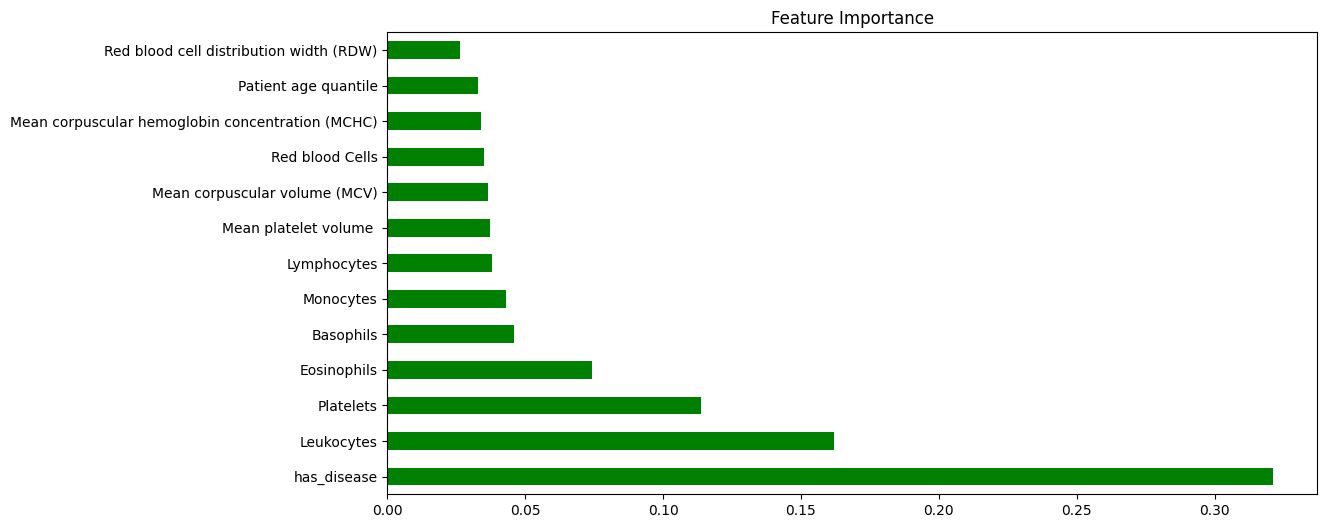

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [45]:
feature_importances = pd.DataFrame(xgb_random.best_estimator_.feature_importances_,
                                index = features,
                                    columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
feature_importances.importance.plot(kind='barh', color='green')
plt.title('Feature Importance')
plt.show()
feature_importances.style.format({'importance': '{:.1%}'.format})
print(feature_importances.importance*100)

In [46]:
df_feat

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
0,126e9dd13932f68,17,0,0,0,0,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,0.357547,-0.625073,1
1,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,0.068652,-0.978899,0
2,6c9d3323975b082,9,0,0,0,0,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759,-1.067355,1
3,d3ea751f3db9de9,11,0,0,0,0,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-0.220244,0.171035,1
4,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,c5b44ff9c7782fd,19,0,0,0,0,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,0.892207,-0.474754,1.066653,0.347948,0
598,88cce1444e16f9c,19,0,0,0,0,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-0.540532,-1.976971,1.670707,0.967144,0
599,2733fac0d3f7138,15,0,0,0,0,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,-0.709090,0.005955,0.909074,-1.155812,0
600,acd761fe16b5d0f,17,0,0,0,0,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,-0.582671,1.408024,1.381812,-0.448160,0


Les fonctionnalités les plus importantes sont très similaires à celles que nous avons vues sur la carte thermique de corrélation.

- Leucocytes
- Plaquettes
- has_disease
- Éosionophiles
- Volume plaquettaire moyen
- Monocytes


# Conclusion

Dans un premier temps nous avons fais un travail de nettoyage des données, à savoir que cette tâche est certinement la plus importante du projet étant donné qu'il y a beaucoup de valeurs absentes dans le dataframe cependant c'est assez représentatif de la réalité dans le cas de la prise en charge de patients. Les différentes stratégies adoptées afin de traiter ce problème ont été détaillée dans le notebook data_clearing, cependant on peut tout à fait considérer d'autres stratégies afin de conserver un maximum de données exploitables.

Pour ce qui est des performances des modèles elles ont pu être améliorer jusqu'a un certain seuil, on a nottament le catboost qui a le meilleur compromis accuracy recall, cependant il est important de noté que la base de test est très petite, il serait pertinent d'alimenter le modèle avec plus de données et d'etoffer la base de test pour voir si il se généralise bien a de nouvelles données.

Au niveau des features importance on identifie quelques paramètres très influent ce qui peut être interessant dans la mesure ou la collecte de donnée pourra être plus pertinente s'il on se base sur ces résultats